In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import pandas as pd
import re
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from scipy.stats import gaussian_kde
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#
# Read in Maxquant Evidence table
#

evidence_df = pd.read_csv('evidence.txt', delimiter='\t')

In [3]:
#
#
# Removing decoys and CONs - Experiment #1
#
#


df_1_1 = evidence_df.loc[evidence_df['Experiment'] == 1]


# removing CON_ and REV_

df_1_2 = df_1_1.loc[~df_1_1['Leading razor protein'].str.contains('CON_')]
df_1_2 = df_1_2.loc[~df_1_2['Leading razor protein'].str.contains('REV_')]
df_1_2.reset_index(inplace = True, drop = True)

# Quantified experimental peptide only

df_1_3 = df_1_2
# df_1_3 = df_1_2.dropna(subset=['Intensity'])
df_1_4 = df_1_3.loc[~df_1_3['Proteins'].str.contains('CON_')]


print("Total Protein IDs:" , df_1_1['Leading razor protein'].nunique())
print("Protein IDs after REV_ and CON_ filtering:" , df_1_2['Leading razor protein'].nunique())
print("Proteins with Mapped Feature:" , df_1_3['Leading razor protein'].nunique())
print('\n')
print("Total Peptide IDs:" , df_1_1['Sequence'].count())
print("Peptide IDs after REV_ and CON_ filtering:" , df_1_2['Sequence'].count())
print("Peptides with Mapped Feature:" , df_1_3['Sequence'].count())
print('\n')
print("Total PSMs:" , df_1_1['MS/MS count'].sum())
print("Peptide PSMs after REV_ and CON_ filtering:" , df_1_2['MS/MS count'].sum())
print("Peptide PSMs with Mapped Feature:" , df_1_3['MS/MS count'].sum())


Total Protein IDs: 2515
Protein IDs after REV_ and CON_ filtering: 2457
Proteins with Mapped Feature: 2457


Total Peptide IDs: 96782
Peptide IDs after REV_ and CON_ filtering: 96465
Peptides with Mapped Feature: 96465


Total PSMs: 100972
Peptide PSMs after REV_ and CON_ filtering: 100651
Peptide PSMs with Mapped Feature: 100651


In [4]:
#
#
# Removing decoys and CONs - Experiment #2
#
#


df_2_1 = evidence_df.loc[evidence_df['Experiment'] == 2]


# removing CON_ and REV_

df_2_2 = df_2_1.loc[~df_2_1['Leading razor protein'].str.contains('CON_')]
df_2_2 = df_2_2.loc[~df_2_2['Leading razor protein'].str.contains('REV_')]
df_2_2.reset_index(inplace = True, drop = True)

# Quantified experimental peptide only

df_2_3 = df_2_2
# df_1_3 = df_1_2.dropna(subset=['Intensity'])
df_2_4 = df_2_3.loc[~df_2_3['Proteins'].str.contains('CON_')]


print("Total Protein IDs:" , df_2_1['Leading razor protein'].nunique())
print("Protein IDs after REV_ and CON_ filtering:" , df_2_2['Leading razor protein'].nunique())
print("Proteins with Mapped Feature:" , df_2_3['Leading razor protein'].nunique())
print('\n')
print("Total Peptide IDs:" , df_2_1['Sequence'].count())
print("Peptide IDs after REV_ and CON_ filtering:" , df_2_2['Sequence'].count())
print("Peptides with Mapped Feature:" , df_2_3['Sequence'].count())
print('\n')
print("Total PSMs:" , df_2_1['MS/MS count'].sum())
print("Peptide PSMs after REV_ and CON_ filtering:" , df_2_2['MS/MS count'].sum())
print("Peptide PSMs with Mapped Feature:" , df_2_3['MS/MS count'].sum())


Total Protein IDs: 2547
Protein IDs after REV_ and CON_ filtering: 2487
Proteins with Mapped Feature: 2487


Total Peptide IDs: 85890
Peptide IDs after REV_ and CON_ filtering: 85564
Peptides with Mapped Feature: 85564


Total PSMs: 89100
Peptide PSMs after REV_ and CON_ filtering: 88770
Peptide PSMs with Mapped Feature: 88770


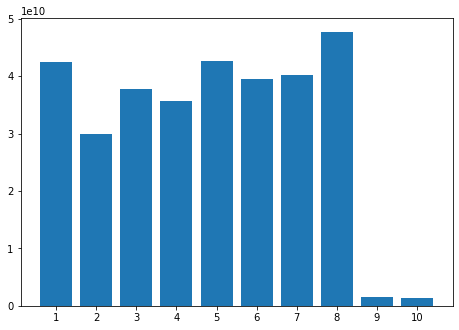

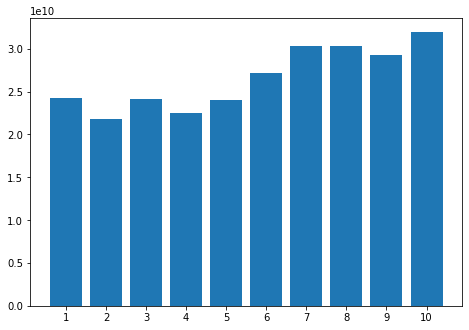

In [5]:
# Reporter intensity 1 (summed) - Experiment #2

# Bar Chart

Reporter_1 = df_1_4['Reporter intensity 1'].sum()
Reporter_2 = df_1_4['Reporter intensity 2'].sum()
Reporter_3 = df_1_4['Reporter intensity 3'].sum()
Reporter_4 = df_1_4['Reporter intensity 4'].sum()
Reporter_5 = df_1_4['Reporter intensity 5'].sum()
Reporter_6 = df_1_4['Reporter intensity 6'].sum()
Reporter_7 = df_1_4['Reporter intensity 7'].sum()
Reporter_8 = df_1_4['Reporter intensity 8'].sum()
Reporter_9 = df_1_4['Reporter intensity 9'].sum()
Reporter_10 = df_1_4['Reporter intensity 10'].sum()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
students = [Reporter_1, Reporter_2, Reporter_3, Reporter_4, Reporter_5, Reporter_6, Reporter_7, Reporter_8, Reporter_9, Reporter_10]
ax.bar(langs,students)
plt.show()


# Reporter intensity (summed) - Experiment #2

# Bar Chart

Reporter_1 = df_2_4['Reporter intensity 1'].sum()
Reporter_2 = df_2_4['Reporter intensity 2'].sum()
Reporter_3 = df_2_4['Reporter intensity 3'].sum()
Reporter_4 = df_2_4['Reporter intensity 4'].sum()
Reporter_5 = df_2_4['Reporter intensity 5'].sum()
Reporter_6 = df_2_4['Reporter intensity 6'].sum()
Reporter_7 = df_2_4['Reporter intensity 7'].sum()
Reporter_8 = df_2_4['Reporter intensity 8'].sum()
Reporter_9 = df_2_4['Reporter intensity 9'].sum()
Reporter_10 = df_2_4['Reporter intensity 10'].sum()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
students = [Reporter_1, Reporter_2, Reporter_3, Reporter_4, Reporter_5, Reporter_6, Reporter_7, Reporter_8, Reporter_9, Reporter_10]
ax.bar(langs,students)
plt.show()

In [6]:
#
#
# Calculating signal proportionality for each measurement - Exp 1
#
#

# Multi-N experiment

df_1_4['Ratio_1_proportion'] = df_1_4['Reporter intensity 1'] / (df_1_4['Reporter intensity 1'] + 
                                                                 df_1_4['Reporter intensity 2'] +
                                                                 df_1_4['Reporter intensity 3'])

df_1_4['Ratio_2_proportion'] = df_1_4['Reporter intensity 2'] / (df_1_4['Reporter intensity 1'] + 
                                                                 df_1_4['Reporter intensity 2'] +
                                                                 df_1_4['Reporter intensity 3'])

df_1_4['Ratio_3_proportion'] = df_1_4['Reporter intensity 3'] / (df_1_4['Reporter intensity 1'] + 
                                                                 df_1_4['Reporter intensity 2'] +
                                                                 df_1_4['Reporter intensity 3'])

# 1-N experiment

df_1_4['Ratio_4_proportion'] = df_1_4['Reporter intensity 4'] / (df_1_4['Reporter intensity 4'] +
                                                                 df_1_4['Reporter intensity 5'] +
                                                                  df_1_4['Reporter intensity 6'] + 
                                                                 df_1_4['Reporter intensity 7'] +
                                                                 df_1_4['Reporter intensity 8'])

df_1_4['Ratio_5_proportion'] = df_1_4['Reporter intensity 5'] / (df_1_4['Reporter intensity 4'] +
                                                                 df_1_4['Reporter intensity 5'] +
                                                                  df_1_4['Reporter intensity 6'] + 
                                                                 df_1_4['Reporter intensity 7'] +
                                                                 df_1_4['Reporter intensity 8'])

df_1_4['Ratio_6_proportion'] = df_1_4['Reporter intensity 6'] / (df_1_4['Reporter intensity 4'] +
                                                                 df_1_4['Reporter intensity 5'] +
                                                                  df_1_4['Reporter intensity 6'] + 
                                                                 df_1_4['Reporter intensity 7'] +
                                                                 df_1_4['Reporter intensity 8'])

df_1_4['Ratio_7_proportion'] = df_1_4['Reporter intensity 7'] / (df_1_4['Reporter intensity 4'] +
                                                                 df_1_4['Reporter intensity 5'] +
                                                                  df_1_4['Reporter intensity 6'] + 
                                                                 df_1_4['Reporter intensity 7'] +
                                                                 df_1_4['Reporter intensity 8'])

df_1_4['Ratio_8_proportion'] = df_1_4['Reporter intensity 8'] / (df_1_4['Reporter intensity 4'] +
                                                                 df_1_4['Reporter intensity 5'] +
                                                                  df_1_4['Reporter intensity 6'] + 
                                                                 df_1_4['Reporter intensity 7'] +
                                                                 df_1_4['Reporter intensity 8'])




#
#
# Calculating signal proportionality for each measurement - Exp 2. NOTE: loading order error accounted for here
#
#

# Multi-N experiment

df_2_4['Ratio_1_proportion'] = df_2_4['Reporter intensity 2'] / (df_2_4['Reporter intensity 2'] + 
                                                                 df_2_4['Reporter intensity 3'] +
                                                                 df_2_4['Reporter intensity 5'])

df_2_4['Ratio_2_proportion'] = df_2_4['Reporter intensity 3'] / (df_2_4['Reporter intensity 2'] + 
                                                                 df_2_4['Reporter intensity 3'] +
                                                                 df_2_4['Reporter intensity 5'])

df_2_4['Ratio_3_proportion'] = df_2_4['Reporter intensity 5'] / (df_2_4['Reporter intensity 2'] + 
                                                                 df_2_4['Reporter intensity 3'] +
                                                                 df_2_4['Reporter intensity 5'])

# 1-N experiment

df_2_4['Ratio_4_proportion'] = df_2_4['Reporter intensity 6'] / (df_2_4['Reporter intensity 6'] +
                                                                 df_2_4['Reporter intensity 7'] +
                                                                 df_2_4['Reporter intensity 8'] + 
                                                                 df_2_4['Reporter intensity 9'] +
                                                                 df_2_4['Reporter intensity 10'])

df_2_4['Ratio_5_proportion'] = df_2_4['Reporter intensity 7'] / (df_2_4['Reporter intensity 6'] +
                                                                 df_2_4['Reporter intensity 7'] +
                                                                 df_2_4['Reporter intensity 8'] + 
                                                                 df_2_4['Reporter intensity 9'] +
                                                                 df_2_4['Reporter intensity 10'])

df_2_4['Ratio_7_proportion'] = df_2_4['Reporter intensity 8'] / (df_2_4['Reporter intensity 6'] +
                                                                 df_2_4['Reporter intensity 7'] +
                                                                 df_2_4['Reporter intensity 8'] + 
                                                                 df_2_4['Reporter intensity 9'] +
                                                                 df_2_4['Reporter intensity 10'])

df_2_4['Ratio_6_proportion'] = df_2_4['Reporter intensity 9'] / (df_2_4['Reporter intensity 6'] +
                                                                 df_2_4['Reporter intensity 7'] +
                                                                 df_2_4['Reporter intensity 8'] + 
                                                                 df_2_4['Reporter intensity 9'] +
                                                                 df_2_4['Reporter intensity 10'])

df_2_4['Ratio_8_proportion'] = df_2_4['Reporter intensity 10'] / (df_2_4['Reporter intensity 6'] +
                                                                  df_2_4['Reporter intensity 7'] +
                                                                  df_2_4['Reporter intensity 8'] + 
                                                                  df_2_4['Reporter intensity 9'] +
                                                                  df_2_4['Reporter intensity 10'])


In [7]:
#
#
# Removing 0 values - Experiment #1
#
#

df_1_5 = df_1_4

df_1_6 = df_1_5.loc[(df_1_5['Ratio_1_proportion'] > 0) & 
                    (df_1_5['Ratio_2_proportion'] > 0) & 
                    (df_1_5['Ratio_3_proportion'] > 0) & 
                    (df_1_5['Ratio_4_proportion'] > 0) &
                    (df_1_5['Ratio_5_proportion'] > 0) &
                    (df_1_5['Ratio_6_proportion'] > 0) & 
                    (df_1_5['Ratio_7_proportion'] > 0) & 
                    (df_1_5['Ratio_8_proportion'] > 0)]


# Peptide measurement number before and after filtering out 0 values from reporter channels
print(len(df_1_4))
print(len(df_1_6))
print('\n')



#
# Removing 0 values - Experiment #2
#

df_2_5 = df_2_4

df_2_6 = df_2_5.loc[(df_2_5['Ratio_1_proportion'] > 0) & 
                    (df_2_5['Ratio_2_proportion'] > 0) & 
                    (df_2_5['Ratio_3_proportion'] > 0) & 
                    (df_2_5['Ratio_4_proportion'] > 0) &
                    (df_2_5['Ratio_5_proportion'] > 0) &
                    (df_2_5['Ratio_6_proportion'] > 0) & 
                    (df_2_5['Ratio_7_proportion'] > 0) & 
                    (df_2_5['Ratio_8_proportion'] > 0)]


# Peptide measurement number before and after filtering out 0 values from reporter channels
print(len(df_2_4))
print(len(df_2_6))
print('\n')

96460
91478


85557
82238




Experiment #1


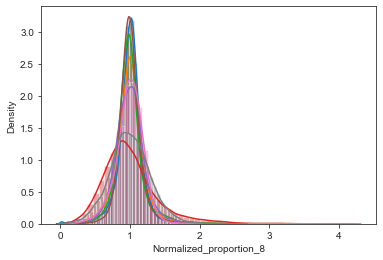

Experiment #2


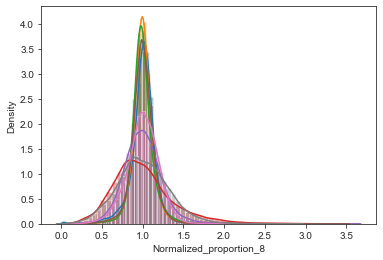

In [8]:
#
#
# Normalization using the mean distribution in each channel - Experiment #1
#
#

sns.set_style('ticks')

df_1_6['Normalized_proportion_1'] = df_1_6['Ratio_1_proportion'] / df_1_6['Ratio_1_proportion'].mean()
df_1_6['Normalized_proportion_2'] = df_1_6['Ratio_2_proportion'] / df_1_6['Ratio_2_proportion'].mean()
df_1_6['Normalized_proportion_3'] = df_1_6['Ratio_3_proportion'] / df_1_6['Ratio_3_proportion'].mean()
df_1_6['Normalized_proportion_4'] = df_1_6['Ratio_4_proportion'] / df_1_6['Ratio_4_proportion'].mean()
df_1_6['Normalized_proportion_5'] = df_1_6['Ratio_5_proportion'] / df_1_6['Ratio_5_proportion'].mean()
df_1_6['Normalized_proportion_6'] = df_1_6['Ratio_6_proportion'] / df_1_6['Ratio_6_proportion'].mean()
df_1_6['Normalized_proportion_7'] = df_1_6['Ratio_7_proportion'] / df_1_6['Ratio_7_proportion'].mean()
df_1_6['Normalized_proportion_8'] = df_1_6['Ratio_8_proportion'] / df_1_6['Ratio_8_proportion'].mean()


sns.distplot(df_1_6['Normalized_proportion_1'])
sns.distplot(df_1_6['Normalized_proportion_2'])
sns.distplot(df_1_6['Normalized_proportion_3'])
sns.distplot(df_1_6['Normalized_proportion_4'])
sns.distplot(df_1_6['Normalized_proportion_5'])
sns.distplot(df_1_6['Normalized_proportion_6'])
sns.distplot(df_1_6['Normalized_proportion_7'])
sns.distplot(df_1_6['Normalized_proportion_8'])

print("Experiment #1")
plt.show()


#
#
# Normalization using the mean distribution in each channel - Experiment #2
#
#

df_2_6['Normalized_proportion_1'] = df_2_6['Ratio_1_proportion'] / df_2_6['Ratio_1_proportion'].mean()
df_2_6['Normalized_proportion_2'] = df_2_6['Ratio_2_proportion'] / df_2_6['Ratio_2_proportion'].mean()
df_2_6['Normalized_proportion_3'] = df_2_6['Ratio_3_proportion'] / df_2_6['Ratio_3_proportion'].mean()
df_2_6['Normalized_proportion_4'] = df_2_6['Ratio_4_proportion'] / df_2_6['Ratio_4_proportion'].mean()
df_2_6['Normalized_proportion_5'] = df_2_6['Ratio_5_proportion'] / df_2_6['Ratio_5_proportion'].mean()
df_2_6['Normalized_proportion_6'] = df_2_6['Ratio_6_proportion'] / df_2_6['Ratio_6_proportion'].mean()
df_2_6['Normalized_proportion_7'] = df_2_6['Ratio_7_proportion'] / df_2_6['Ratio_7_proportion'].mean()
df_2_6['Normalized_proportion_8'] = df_2_6['Ratio_8_proportion'] / df_2_6['Ratio_8_proportion'].mean()


sns.distplot(df_2_6['Normalized_proportion_1'])
sns.distplot(df_2_6['Normalized_proportion_2'])
sns.distplot(df_2_6['Normalized_proportion_3'])
sns.distplot(df_2_6['Normalized_proportion_4'])
sns.distplot(df_2_6['Normalized_proportion_5'])
sns.distplot(df_2_6['Normalized_proportion_6'])
sns.distplot(df_2_6['Normalized_proportion_7'])
sns.distplot(df_2_6['Normalized_proportion_8'])

print("Experiment #2")
plt.show()

In [9]:
#
# Log transformation
#

df_1_6['Normalized_proportion_1_log2'] = np.log2(df_1_6['Normalized_proportion_1'])
df_1_6['Normalized_proportion_2_log2'] = np.log2(df_1_6['Normalized_proportion_2'])
df_1_6['Normalized_proportion_3_log2'] = np.log2(df_1_6['Normalized_proportion_3'])
df_1_6['Normalized_proportion_4_log2'] = np.log2(df_1_6['Normalized_proportion_4'])
df_1_6['Normalized_proportion_5_log2'] = np.log2(df_1_6['Normalized_proportion_5'])
df_1_6['Normalized_proportion_6_log2'] = np.log2(df_1_6['Normalized_proportion_6'])
df_1_6['Normalized_proportion_7_log2'] = np.log2(df_1_6['Normalized_proportion_7'])
df_1_6['Normalized_proportion_8_log2'] = np.log2(df_1_6['Normalized_proportion_8'])

df_2_6['Normalized_proportion_1_log2'] = np.log2(df_2_6['Normalized_proportion_1'])
df_2_6['Normalized_proportion_2_log2'] = np.log2(df_2_6['Normalized_proportion_2'])
df_2_6['Normalized_proportion_3_log2'] = np.log2(df_2_6['Normalized_proportion_3'])
df_2_6['Normalized_proportion_4_log2'] = np.log2(df_2_6['Normalized_proportion_4'])
df_2_6['Normalized_proportion_5_log2'] = np.log2(df_2_6['Normalized_proportion_5'])
df_2_6['Normalized_proportion_6_log2'] = np.log2(df_2_6['Normalized_proportion_6'])
df_2_6['Normalized_proportion_7_log2'] = np.log2(df_2_6['Normalized_proportion_7'])
df_2_6['Normalized_proportion_8_log2'] = np.log2(df_2_6['Normalized_proportion_8'])

In [10]:
#
#
# Line fitting using np.polyfit - return the slope and mean squared error for Experiment #1
#
#


df_fit = pd.DataFrame({'slope_1': [''],
                       'mean_sqr_error_1': [''], 
                         'slope_2': [''],
                       'mean_sqr_error_2': ['']} , index=df_1_6.index)
slope = []
mean_sqr_error = []
for index, row in df_1_6.iterrows():
    x = [-1.0, -0.91, 0.99]
    y = [row['Normalized_proportion_1_log2'],
         row['Normalized_proportion_2_log2'], 
         row['Normalized_proportion_3_log2']]
    fit = np.polyfit(x, y, 1, full=True)
    tuple1 = fit[0]
    slope.append(tuple1[0])
    mean_sqr_error.append(fit[1][0])
    
    
df_fit['slope_1'] = slope
df_fit['mean_sqr_error_1'] = mean_sqr_error



slope = []
mean_sqr_error = []
for index, row in df_1_6.iterrows():
    x = [-1.16, -0.64, -0.02, 0.41, 0.68]
    y = [row['Normalized_proportion_4_log2'], 
         row['Normalized_proportion_5_log2'], 
         row['Normalized_proportion_6_log2'],
         row['Normalized_proportion_7_log2'],
         row['Normalized_proportion_8_log2']]
    fit = np.polyfit(x, y, 1, full=True)
    tuple1 = fit[0]
    slope.append(tuple1[0])
    mean_sqr_error.append(fit[1][0])
    
    
df_fit['slope_2'] = slope
df_fit['mean_sqr_error_2'] = mean_sqr_error


#
#
# Adding slopes and MSE to primary dataframe - Experiment #1 and 2
#
#

df_1_8 = df_1_6.join(df_fit)

In [11]:
#
#
# Line fitting using np.polyfit - return the slope and mean squared error for Experiment #2
#
#


df_fit = pd.DataFrame({'slope_1': [''],
                       'mean_sqr_error_1': [''], 
                         'slope_2': [''],
                       'mean_sqr_error_2': ['']} , index=df_2_6.index)
slope = []
mean_sqr_error = []
for index, row in df_2_6.iterrows():
    x = [-1.0, -0.91, 0.99]
    y = [row['Normalized_proportion_1_log2'],
         row['Normalized_proportion_2_log2'], 
         row['Normalized_proportion_3_log2']]
    fit = np.polyfit(x, y, 1, full=True)
    tuple1 = fit[0]
    slope.append(tuple1[0])
    mean_sqr_error.append(fit[1][0])
    
    
df_fit['slope_1'] = slope
df_fit['mean_sqr_error_1'] = mean_sqr_error



slope = []
mean_sqr_error = []
for index, row in df_2_6.iterrows():
    x = [-1.16, -0.64, -0.02, 0.41, 0.68]
    y = [row['Normalized_proportion_4_log2'], 
         row['Normalized_proportion_5_log2'], 
         row['Normalized_proportion_6_log2'],
         row['Normalized_proportion_7_log2'],
         row['Normalized_proportion_8_log2']]
    fit = np.polyfit(x, y, 1, full=True)
    tuple1 = fit[0]
    slope.append(tuple1[0])
    mean_sqr_error.append(fit[1][0])
    
    
df_fit['slope_2'] = slope
df_fit['mean_sqr_error_2'] = mean_sqr_error


#
#
# Adding slopes and MSE to primary dataframe - Experiment #1 and 2
#
#

df_2_8 = df_2_6.join(df_fit)

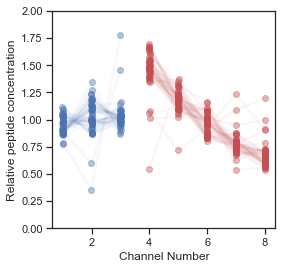

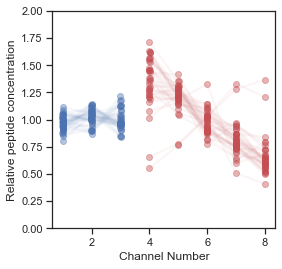

In [12]:
# peptide regplots for specific proteins - each dotted line represents a single peptide measurement

# Pick a protein!

Protein = "DBHB_ECOLI"


sns.set(rc={'figure.figsize':(4,4)})
sns.set_style('ticks')


#
# Exp 1
#

df_Protein = df_1_8.loc[(df_1_8['Leading razor protein'].str.contains(Protein))
                      & (df_1_8['mean_sqr_error_1'] < 1)]
        
for index, row in df_Protein.iterrows():
    x = [1, 2, 3]
    y = [row['Normalized_proportion_1'],
         row['Normalized_proportion_2'], 
         row['Normalized_proportion_3']]
    g = sns.regplot(x=x,y=y, fit_reg=True, ci=False, scatter_kws={'alpha':0.4}, 
                line_kws={'alpha':0.05}, lowess=True, color = 'b', x_jitter = 0.01)
    

for index, row in df_Protein.iterrows():
    x = [4, 5, 6, 7, 8]
    y = [row['Normalized_proportion_4'],
         row['Normalized_proportion_5'],
         row['Normalized_proportion_6'],
         row['Normalized_proportion_7'],
         row['Normalized_proportion_8']]
    g = sns.regplot(x=x,y=y, fit_reg=True, ci=False, scatter_kws={'alpha':0.4}, 
                line_kws={'alpha':0.05}, lowess=True, color = 'r', x_jitter = 0.01)
    
plt.ylim([0, 2])
plt.xlabel("Channel Number")
plt.ylabel("Relative peptide concentration")
df_Protein.head(50)
plt.show()


#
# Exp 2
#

df_Protein = df_2_8.loc[(df_2_8['Leading razor protein'].str.contains(Protein))
                      & (df_2_8['mean_sqr_error_1'] < 1)]    
    
for index, row in df_Protein.iterrows():
    x = [1, 2, 3]
    y = [row['Normalized_proportion_1'],
         row['Normalized_proportion_2'], 
         row['Normalized_proportion_3']]
    g = sns.regplot(x=x,y=y, fit_reg=True, ci=False, scatter_kws={'alpha':0.4}, 
                line_kws={'alpha':0.05}, lowess=True, color = 'b', x_jitter = 0.01)
    
sns.set_style('ticks')
for index, row in df_Protein.iterrows():
    x = [4, 5, 6, 7, 8]
    y = [row['Normalized_proportion_4'],
         row['Normalized_proportion_5'],
         row['Normalized_proportion_6'],
         row['Normalized_proportion_7'],
         row['Normalized_proportion_8']]
    g = sns.regplot(x=x,y=y, fit_reg=True, ci=False, scatter_kws={'alpha':0.4}, 
                line_kws={'alpha':0.05}, lowess=True, color = 'r', x_jitter = 0.01)
    
plt.ylim([0, 2])
plt.xlabel("Channel Number")
plt.ylabel("Relative peptide concentration")
df_Protein.head(50)
plt.show()

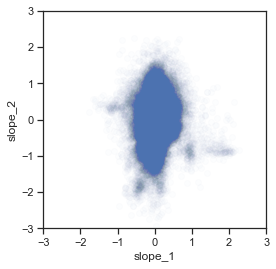

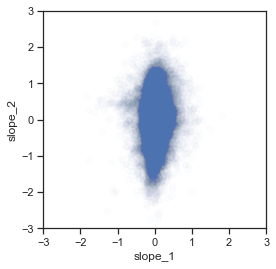

91478
87947
85117


82238
79512
77836


In [13]:
#
#
# BEGIN PEPTIDE-LEVEL COMBINED ANALYSIS --- Fractions as unique -- Exp 1 and 2
#
#

Mean_squared_error = 1

df_1_9 = df_1_8.loc[(df_1_8['mean_sqr_error_2'] < Mean_squared_error)]
df_2_9 = df_2_8.loc[(df_2_8['mean_sqr_error_2'] < Mean_squared_error)]

#
# Unique Identifiers for each peptide-level measurement
#

df_charge_1 = df_1_9['Charge'].astype(str)
df_fraction_1 = df_1_9['Fraction'].astype(str)
df_charge_2 = df_2_9['Charge'].astype(str)
df_fraction_2 = df_2_9['Fraction'].astype(str)

df_1_9['UniqID'] = df_1_9['Modified sequence'] + 'c' + df_charge_1 + '_' + 'f' + df_fraction_1 + '_' + df_1_9['Leading razor protein']
df_2_9['UniqID'] = df_2_9['Modified sequence'] + 'c' + df_charge_2 + '_' + 'f' + df_fraction_2 + '_' + df_2_9['Leading razor protein']

#
# groupby - Unique Identifiers
#

df_1_gb_mean = df_1_9.groupby(['UniqID']).mean()
df_1_uID = df_1_gb_mean
df_2_gb_mean = df_2_9.groupby(['UniqID']).mean()
df_2_uID = df_2_gb_mean


#
# Simplify dataframe
#

df_1_uID_slopes = df_1_uID[['slope_1', 'mean_sqr_error_1', 'slope_2', 'mean_sqr_error_2',
                                        'Normalized_proportion_1', 
                                        'Normalized_proportion_2',
                                        'Normalized_proportion_3',
                                        'Normalized_proportion_4', 
                                        'Normalized_proportion_5',
                                        'Normalized_proportion_6', 
                                        'Normalized_proportion_7',
                                        'Normalized_proportion_8']]

df_1_uID_slopes = df_1_uID_slopes.reset_index()


df_2_uID_slopes = df_2_uID[['slope_1', 'mean_sqr_error_1', 'slope_2', 'mean_sqr_error_2',
                                        'Normalized_proportion_1', 
                                        'Normalized_proportion_2',
                                        'Normalized_proportion_3',
                                        'Normalized_proportion_4', 
                                        'Normalized_proportion_5',
                                        'Normalized_proportion_6', 
                                        'Normalized_proportion_7',
                                        'Normalized_proportion_8']]

df_2_uID_slopes = df_2_uID_slopes.reset_index()



sns.set(rc={'figure.figsize':(4,4)})
sns.set_style('ticks')

sns.regplot(x='slope_1', y='slope_2', data=df_1_uID_slopes, fit_reg=False, scatter_kws={'alpha':.01})

plt.ylim([-3, 3])
plt.xlim([-3, 3])
plt.show()

sns.regplot(x='slope_1', y='slope_2', data=df_2_uID_slopes, fit_reg=False, scatter_kws={'alpha':.01})

plt.ylim([-3, 3])
plt.xlim([-3, 3])
plt.show()


print(len(df_1_8))
print(len(df_1_9))
print(len(df_1_uID_slopes))
print("\n")
print(len(df_2_8))
print(len(df_2_9))
print(len(df_2_uID_slopes))

In [14]:
#
# Extracting Protein name
#

split_1 = df_1_uID_slopes['UniqID'].str.rsplit(pat='|', n=1, expand=True)
df_1_uID_slopes['Protein'] = split_1[1]
df_1_uID_slopes

split_2 = df_2_uID_slopes['UniqID'].str.rsplit(pat='|', n=1, expand=True)
df_2_uID_slopes['Protein'] = split_2[1]
df_2_uID_slopes

,UniqID,slope_1,mean_sqr_error_1,slope_2,mean_sqr_error_2,Normalized_proportion_1,Normalized_proportion_2,Normalized_proportion_3,Normalized_proportion_4,Normalized_proportion_5,Normalized_proportion_6,Normalized_proportion_7,Normalized_proportion_8,Protein
0,_(Acetyl (Protein N-term))AEITASLVK_c2_f3_sp|P...,-0.078603,0.000247,0.607495,0.184937,1.046579,1.025540,0.932336,0.601920,0.739791,1.125583,1.438092,1.100811,EFTS_ECOLI
1,_(Acetyl (Protein N-term))AESTVTADSK_c2_f0_sp|...,-0.014117,0.001842,0.053344,0.144273,0.985743,1.027159,0.985829,0.920756,1.124333,0.815315,1.099614,1.038734,KGTP_ECOLI
2,_(Acetyl (Protein N-term))AQAEVLNLESGAK_c2_f1_...,0.008715,0.000405,-1.511364,0.668144,1.005573,0.986476,1.008439,1.894055,1.416634,0.944239,0.542546,0.228020,RECQ_ECOLI
3,_(Acetyl (Protein N-term))AQEYTVEQLNHGR_c2_f1_...,-0.041820,0.012597,-0.623184,0.336227,0.964620,1.073907,0.958338,1.294714,1.217617,1.248082,0.624048,0.622723,SECF_ECOLI
4,_(Acetyl (Protein N-term))M(Oxidation (M))DNAR...,-0.280548,0.114623,0.219246,0.582967,0.947625,1.297335,0.750904,0.678463,1.330649,0.759647,1.185049,1.042549,YDFW_ECOLI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77831,_YYSVIYNLIDEVK_c3_f5_sp|P0A705|IF2_ECOLI,-0.050263,0.003105,0.766394,0.111628,0.996683,1.049295,0.953841,0.585161,0.687128,0.889898,1.128416,1.682443,IF2_ECOLI
77832,_YYSVIYNLIDEVK_c3_f7_sp|P0A705|IF2_ECOLI,0.116598,0.000839,0.430923,0.022808,0.954538,0.934614,1.106392,0.739791,0.843053,0.962831,1.097657,1.343495,IF2_ECOLI
77833,_YYTETEGALR_c2_f2_sp|P32160|YIIQ_ECOLI,0.262784,0.029274,-0.057468,0.409765,0.793642,0.953950,1.232850,0.828523,1.179817,1.200800,1.073246,0.728001,YIIQ_ECOLI
77834,_YYWPHSR_c3_f0_sp|P0C8J8|GATZ_ECOLI,-0.031147,0.015864,-2.186541,0.519281,0.952961,1.075992,0.966821,2.519450,1.410442,0.622571,0.351482,0.126633,GATZ_ECOLI


In [15]:
# Groupby for cutoff -- Exp1

df_1_uID_slopes_protein_mean = df_1_uID_slopes.groupby(['Protein']).mean()
df_1_uID_slopes_protein_median = df_1_uID_slopes.groupby(['Protein']).median()
df_1_uID_slopes_protein_std = df_1_uID_slopes.groupby(['Protein']).std()
df_1_uID_slopes_protein_var = df_1_uID_slopes.groupby(['Protein']).var()
df_1_uID_slopes_protein_count = df_1_uID_slopes.groupby(['Protein']).count()


# Protein level df -- Exp1

Protein_level_df_1 = pd.concat([df_1_uID_slopes_protein_count['UniqID'],
                              df_1_uID_slopes_protein_median], 
                              axis=1)

Protein_level_df_1 = Protein_level_df_1.dropna()



# Groupby for cutoff -- Exp2

df_2_uID_slopes_protein_mean = df_2_uID_slopes.groupby(['Protein']).mean()
df_2_uID_slopes_protein_median = df_2_uID_slopes.groupby(['Protein']).median()
df_2_uID_slopes_protein_std = df_2_uID_slopes.groupby(['Protein']).std()
df_2_uID_slopes_protein_var = df_2_uID_slopes.groupby(['Protein']).var()
df_2_uID_slopes_protein_count = df_2_uID_slopes.groupby(['Protein']).count()


# Protein level df -- Exp2

Protein_level_df_2 = pd.concat([df_2_uID_slopes_protein_count['UniqID'],
                              df_2_uID_slopes_protein_median], 
                              axis=1)

Protein_level_df_2 = Protein_level_df_2.dropna()

In [16]:
#
# log2 transform
#

Protein_level_df_1['Normalized_proportion_1_log2'] = np.log2(Protein_level_df_1['Normalized_proportion_1'])
Protein_level_df_1['Normalized_proportion_2_log2'] = np.log2(Protein_level_df_1['Normalized_proportion_2'])
Protein_level_df_1['Normalized_proportion_3_log2'] = np.log2(Protein_level_df_1['Normalized_proportion_3'])
Protein_level_df_1['Normalized_proportion_4_log2'] = np.log2(Protein_level_df_1['Normalized_proportion_4'])
Protein_level_df_1['Normalized_proportion_5_log2'] = np.log2(Protein_level_df_1['Normalized_proportion_5'])
Protein_level_df_1['Normalized_proportion_6_log2'] = np.log2(Protein_level_df_1['Normalized_proportion_6'])
Protein_level_df_1['Normalized_proportion_7_log2'] = np.log2(Protein_level_df_1['Normalized_proportion_7'])
Protein_level_df_1['Normalized_proportion_8_log2'] = np.log2(Protein_level_df_1['Normalized_proportion_8'])

Protein_level_df_2['Normalized_proportion_1_log2'] = np.log2(Protein_level_df_2['Normalized_proportion_1'])
Protein_level_df_2['Normalized_proportion_2_log2'] = np.log2(Protein_level_df_2['Normalized_proportion_2'])
Protein_level_df_2['Normalized_proportion_3_log2'] = np.log2(Protein_level_df_2['Normalized_proportion_3'])
Protein_level_df_2['Normalized_proportion_4_log2'] = np.log2(Protein_level_df_2['Normalized_proportion_4'])
Protein_level_df_2['Normalized_proportion_5_log2'] = np.log2(Protein_level_df_2['Normalized_proportion_5'])
Protein_level_df_2['Normalized_proportion_6_log2'] = np.log2(Protein_level_df_2['Normalized_proportion_6'])
Protein_level_df_2['Normalized_proportion_7_log2'] = np.log2(Protein_level_df_2['Normalized_proportion_7'])
Protein_level_df_2['Normalized_proportion_8_log2'] = np.log2(Protein_level_df_2['Normalized_proportion_8'])

In [17]:
#
#
# Protein Slope Calculation - Slope_1 is Multi-N cells. Slope_2 is 1-N.
#
#

#
# Line fitting using np.polyfit -- Exp1
#

Protein_df_fit_1 = pd.DataFrame({'slope_1_ProtCalc': [''],
                       'mean_sqr_error_1_ProtCalc': ['']} , index = Protein_level_df_1.index)
Protein_df_fit_2 = pd.DataFrame({'slope_2_ProtCalc': [''],
                       'mean_sqr_error_2_ProtCalc': ['']} , index = Protein_level_df_1.index)
slope_1_ProtCalc = []
mean_sqr_error_1_ProtCalc = []
slope_2_ProtCalc = []
mean_sqr_error_2_ProtCalc = []


# X-axis is relative change in cell area

for index, row in Protein_level_df_1.iterrows():
    x_1 = [-1.0, -0.91, 0.99]
    x_2 = [-1.16, -0.64, -0.02, 0.41, 0.68]
    y_1 = [row['Normalized_proportion_1_log2'], 
           row['Normalized_proportion_2_log2'], 
           row['Normalized_proportion_3_log2']]
    y_2 = [row['Normalized_proportion_4_log2'], 
           row['Normalized_proportion_5_log2'], 
           row['Normalized_proportion_6_log2'],
           row['Normalized_proportion_7_log2'],
           row['Normalized_proportion_8_log2']]
    fit = np.polyfit(x_1, y_1, 1, full=True)
    tuple1 = fit[0]
    slope_1_ProtCalc.append(tuple1[0])
    mean_sqr_error_1_ProtCalc.append(fit[1][0])
    fit = np.polyfit(x_2, y_2, 1, full=True)
    tuple1 = fit[0]
    slope_2_ProtCalc.append(tuple1[0])
    mean_sqr_error_2_ProtCalc.append(fit[1][0])
    
    
Protein_df_fit_1['slope_1_ProtCalc'] = slope_1_ProtCalc
Protein_df_fit_1['mean_sqr_error_1_ProtCalc'] = mean_sqr_error_1_ProtCalc

Protein_df_fit_2['slope_2_ProtCalc'] = slope_2_ProtCalc
Protein_df_fit_2['mean_sqr_error_2_ProtCalc'] = mean_sqr_error_2_ProtCalc

Protein_Slopes_exp1 = pd.concat([Protein_level_df_1, Protein_df_fit_1, Protein_df_fit_2], axis=1)
Protein_Slopes_exp1.to_csv('Protein_level_slopes_exp1.csv')


#
# Line fitting using np.polyfit -- Exp2
#

Protein_df_fit_1 = pd.DataFrame({'slope_1_ProtCalc': [''],
                       'mean_sqr_error_1_ProtCalc': ['']} , index = Protein_level_df_2.index)
Protein_df_fit_2 = pd.DataFrame({'slope_2_ProtCalc': [''],
                       'mean_sqr_error_2_ProtCalc': ['']} , index = Protein_level_df_2.index)
slope_1_ProtCalc = []
mean_sqr_error_1_ProtCalc = []
slope_2_ProtCalc = []
mean_sqr_error_2_ProtCalc = []


# X-axis is relative change in cell area

for index, row in Protein_level_df_2.iterrows():
    x_1 = [-1.0, -0.91, 0.99]
    x_2 = [-1.13, -0.64, -0.04, 0.45, 0.65]
    y_1 = [row['Normalized_proportion_1_log2'], 
           row['Normalized_proportion_2_log2'], 
           row['Normalized_proportion_3_log2']]
    y_2 = [row['Normalized_proportion_4_log2'], 
           row['Normalized_proportion_5_log2'], 
           row['Normalized_proportion_6_log2'],
           row['Normalized_proportion_7_log2'],
           row['Normalized_proportion_8_log2']]
    fit = np.polyfit(x_1, y_1, 1, full=True)
    tuple1 = fit[0]
    slope_1_ProtCalc.append(tuple1[0])
    mean_sqr_error_1_ProtCalc.append(fit[1][0])
    fit = np.polyfit(x_2, y_2, 1, full=True)
    tuple1 = fit[0]
    slope_2_ProtCalc.append(tuple1[0])
    mean_sqr_error_2_ProtCalc.append(fit[1][0])
    
    
Protein_df_fit_1['slope_1_ProtCalc'] = slope_1_ProtCalc
Protein_df_fit_1['mean_sqr_error_1_ProtCalc'] = mean_sqr_error_1_ProtCalc

Protein_df_fit_2['slope_2_ProtCalc'] = slope_2_ProtCalc
Protein_df_fit_2['mean_sqr_error_2_ProtCalc'] = mean_sqr_error_2_ProtCalc

Protein_Slopes_exp2 = pd.concat([Protein_level_df_2, Protein_df_fit_1, Protein_df_fit_2], axis=1)
Protein_Slopes_exp2.to_csv('Protein_level_slopes_2.csv')

13
1752
-0.0796524712356103


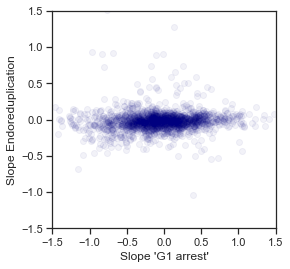

13
1820
-0.056888618280216234


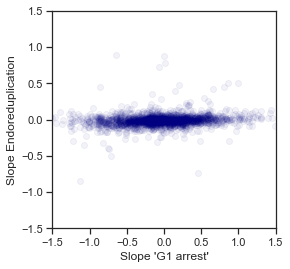

In [18]:
#
# Scatterplot for Protein Slope value - 1-N vs Multi-N for Experiment #1 and #2. Slope_1 is Multi-N cells. Slope_2 is 1-N cells.
#


sns.set(rc={'figure.figsize':(4,4)})
sns.set_style('ticks')

Protein_plot = Protein_Slopes_exp1.loc[Protein_Slopes_exp1['UniqID'] > 5]


sns.regplot(data=Protein_plot, x='slope_2_ProtCalc', y='slope_1_ProtCalc', 
            color = 'navy', scatter_kws={'alpha':0.05}, fit_reg=False)


plt.xlabel("Slope 'G1 arrest'")
plt.ylabel("Slope Endoreduplication")
plt.ylim([-1.5, 1.5])
plt.xlim([-1.5, 1.5])
print(len("Experiment #1"))
print(len(Protein_plot))
print(Protein_plot['slope_2_ProtCalc'].mean())
plt.show()



Protein_plot = Protein_Slopes_exp2.loc[Protein_Slopes_exp2['UniqID'] > 5]

sns.regplot(data=Protein_plot, x='slope_2_ProtCalc', y='slope_1_ProtCalc', 
            color = 'navy', scatter_kws={'alpha':0.05}, fit_reg=False)


plt.xlabel("Slope 'G1 arrest'")
plt.ylabel("Slope Endoreduplication")
plt.ylim([-1.5, 1.5])
plt.xlim([-1.5, 1.5])
print(len("Experiment #2"))
print(len(Protein_plot))
print(Protein_plot['slope_2_ProtCalc'].mean())
plt.show()

In [19]:
#
# Combine two biological replicate experiments. Slope_1 is Multi-N cells. Slope_2 is 1-N cells.
#


Exp1_df = Protein_Slopes_exp1[['UniqID', 'slope_1_ProtCalc', 'slope_2_ProtCalc',
                           'Normalized_proportion_1',
                           'Normalized_proportion_2',
                           'Normalized_proportion_3',
                           'Normalized_proportion_4',
                           'Normalized_proportion_5',
                           'Normalized_proportion_6',
                           'Normalized_proportion_7',
                           'Normalized_proportion_8']]

Exp1_df = Exp1_df.rename(columns={'UniqID' : 'UniqID_exp1',
                                  'slope_1_ProtCalc' : 'slope_1_ProtCalc_exp1',
                                  'slope_2_ProtCalc' : 'slope_2_ProtCalc_exp1',
                                  'Normalized_proportion_1' : 'Normalized_proportion_1_exp1',
                                  'Normalized_proportion_2' : 'Normalized_proportion_2_exp1',
                                  'Normalized_proportion_3' : 'Normalized_proportion_3_exp1',
                                  'Normalized_proportion_4' : 'Normalized_proportion_4_exp1',
                                  'Normalized_proportion_5' : 'Normalized_proportion_5_exp1',
                                  'Normalized_proportion_6' : 'Normalized_proportion_6_exp1',
                                  'Normalized_proportion_7' : 'Normalized_proportion_7_exp1',
                                  'Normalized_proportion_8' : 'Normalized_proportion_8_exp1'})

Exp2_df = Protein_Slopes_exp2[['UniqID', 'slope_1_ProtCalc', 'slope_2_ProtCalc',
                           'Normalized_proportion_1',
                           'Normalized_proportion_2',
                           'Normalized_proportion_3',
                           'Normalized_proportion_4',
                           'Normalized_proportion_5',
                           'Normalized_proportion_6',
                           'Normalized_proportion_7',
                           'Normalized_proportion_8']]

Exp2_df = Exp2_df.rename(columns={'UniqID' : 'UniqID_exp2',
                                  'slope_1_ProtCalc' : 'slope_1_ProtCalc_exp2',
                                  'slope_2_ProtCalc' : 'slope_2_ProtCalc_exp2',
                                  'Normalized_proportion_1' : 'Normalized_proportion_1_exp2',
                                  'Normalized_proportion_2' : 'Normalized_proportion_2_exp2',
                                  'Normalized_proportion_3' : 'Normalized_proportion_3_exp2',
                                  'Normalized_proportion_4' : 'Normalized_proportion_4_exp2',
                                  'Normalized_proportion_5' : 'Normalized_proportion_5_exp2',
                                  'Normalized_proportion_6' : 'Normalized_proportion_6_exp2',
                                  'Normalized_proportion_7' : 'Normalized_proportion_7_exp2',
                                  'Normalized_proportion_8' : 'Normalized_proportion_8_exp2'})

# Read in PD identifiers

PD_identifiers = pd.read_csv('Uniprot_Identifiers_Ecoli.csv')
PD_identifiers = PD_identifiers.set_index('Entry name')

#Concat with slopes and identifiers datasets

combined_df = pd.concat([Exp1_df, Exp2_df, PD_identifiers], axis=1)
combined_df = combined_df.dropna(subset=['UniqID_exp1' , 'UniqID_exp2'])
combined_df

,UniqID_exp1,slope_1_ProtCalc_exp1,slope_2_ProtCalc_exp1,Normalized_proportion_1_exp1,Normalized_proportion_2_exp1,Normalized_proportion_3_exp1,Normalized_proportion_4_exp1,Normalized_proportion_5_exp1,Normalized_proportion_6_exp1,Normalized_proportion_7_exp1,...,Cross-reference (STRING),Cross-reference (BioGRID),Induction,Function [CC],Kinetics,Cofactor,EC number,Pathway,Compositional bias,Motif
3MG1_ECOLI,2.0,0.006834,-0.986595,1.014015,0.974422,1.004625,1.797117,1.164153,1.011419,0.685081,...,511145.b3549;,4261555;851471;,NaN,FUNCTION: Hydrolysis of the deoxyribose N-glyc...,NaN,NaN,3.2.2.20,NaN,NaN,NaN
3MG2_ECOLI,3.0,-0.065586,-0.021062,0.972219,1.080460,0.934615,0.884508,1.133208,1.041304,0.918765,...,511145.b2068;,4259681;,INDUCTION: Up-regulated by methylated Ada in r...,FUNCTION: Hydrolysis of the deoxyribose N-glyc...,NaN,NaN,3.2.2.21,NaN,NaN,NaN
3PASE_ECOLI,28.0,-0.050830,0.051803,1.015053,1.049019,0.962346,0.952634,0.955688,1.043907,1.025910,...,511145.b3054;,4259253;,NaN,FUNCTION: Involved in the hydrolysis of the be...,BIOPHYSICOCHEMICAL PROPERTIES: Kinetic parame...,NaN,3.6.1.25,NaN,NaN,NaN
5DNU_ECOLI,16.0,-0.000834,0.258775,1.059965,0.910171,0.986312,0.747537,1.004919,1.063771,1.032269,...,511145.b2291;,4262969;,NaN,FUNCTION: Essential component of the deoxycyti...,BIOPHYSICOCHEMICAL PROPERTIES: Kinetic parame...,COFACTOR: Name=Co(2+); Xref=ChEBI:CHEBI:48828;...,3.1.3.89,NaN,NaN,NaN
5FCL_ECOLI,2.0,-0.000018,-0.205583,1.131396,0.834614,0.982030,0.949203,1.405979,0.861439,0.959071,...,511145.b2912;,4261171;,INDUCTION: During biofilm formation. {ECO:0000...,FUNCTION: Involved in the removal of 5-formylt...,NaN,NaN,6.3.3.2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNTB_ECOLI,4.0,-0.123357,-0.476895,1.049318,1.041401,0.885187,1.417144,1.105049,1.048989,0.831512,...,511145.b1342;,4261064;850275;,NaN,FUNCTION: Mediates efflux of zinc ions. {ECO:0...,NaN,NaN,NaN,NaN,NaN,NaN
ZNUA_ECOLI,55.0,0.013764,-0.505471,0.995357,0.996600,1.014619,1.290952,1.289854,0.948163,0.834637,...,511145.b1857;,4260353;,INDUCTION: Maximally induced 30 minutes under ...,FUNCTION: Involved in the high-affinity zinc u...,NaN,NaN,NaN,NaN,NaN,NaN
ZNUC_ECOLI,5.0,-0.006406,-0.469191,1.051086,0.866742,0.952607,1.186803,1.274501,1.051246,0.798194,...,511145.b1858;,4263224;,INDUCTION: Transcriptionally repressed by zur ...,FUNCTION: Part of the ABC transporter complex ...,NaN,NaN,7.2.2.20,NaN,NaN,NaN
ZRAR_ECOLI,5.0,-0.141475,-0.703203,1.038619,1.051820,0.863061,1.558442,1.179282,0.986174,0.778728,...,511145.b4004;,4262463;,NaN,FUNCTION: Member of the two-component regulato...,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Renaming dfs

df_1 = combined_df

In [21]:
#
# Annotaion parsing to classify ribosomal proteins and other groups
#

# Column to search
Column = ['Protein names', 
          'Protein names', 
          'Protein names',
          'Protein names', 
          'Protein names',
          'Transmembrane',
          'Subcellular location [CC]',
          'Subcellular location [CC]',]

# Term to search for
Identifier = ['26S proteasome', 
              '50S ribosomal protein', 
              '30S ribosomal protein',
              'Ribosomal RNA large subunit methyltransferase',
              'Ribosomal RNA small subunit methyltransferase',
              'TRANSMEM',
              'nucleoid',
              'ECO:0000250']

# Output Column name
Output = ['26S_proteasome', 
          '50S_ribosomal_protein', 
          '30S_ribosomal_protein',
          'large_ribosomal_methyltransferase', 
          'small_ribosomal_methyltransferase',
          'TRANSMEM',
          'nucleoid',
          'periplasm']



#Generate parsing dataframe
parsing_df = pd.DataFrame(list(zip(Column, Identifier, Output)), columns =['Column', 'Identifier', 'Output']) 

# reset the dataframe
df_2 = df_1

# Parsing loop
for index, row in parsing_df.iterrows():
    Column = row['Column']
    Identifier = row['Identifier']
    Output = row['Output']
    
    df_protein_complex = pd.DataFrame({Output: ['']}, index = df_1.index)
    temp_list = []
    df_1[Column] = df_1[Column].apply(str)
    for values in df_1[Column]:
        temp_list.append(bool(re.search(Identifier, values)))
   
    df_protein_complex[Output] = temp_list
    df_2 = pd.concat([df_2, df_protein_complex], axis=1, sort=False)
    
df_2.head(1)

,UniqID_exp1,slope_1_ProtCalc_exp1,slope_2_ProtCalc_exp1,Normalized_proportion_1_exp1,Normalized_proportion_2_exp1,Normalized_proportion_3_exp1,Normalized_proportion_4_exp1,Normalized_proportion_5_exp1,Normalized_proportion_6_exp1,Normalized_proportion_7_exp1,...,Compositional bias,Motif,26S_proteasome,50S_ribosomal_protein,30S_ribosomal_protein,large_ribosomal_methyltransferase,small_ribosomal_methyltransferase,TRANSMEM,nucleoid,periplasm
3MG1_ECOLI,2.0,0.006834,-0.986595,1.014015,0.974422,1.004625,1.797117,1.164153,1.011419,0.685081,...,NaN,NaN,False,False,False,False,False,False,False,False


In [24]:
#
# Averaging from two replicate experiments. Slope_1 is Multi-N cells. Slope_2 is 1-N cells.
#

df_2['Mean_Slope_1'] = (df_2['slope_1_ProtCalc_exp1'] + df_2['slope_1_ProtCalc_exp2']) / 2
df_2['Mean_Slope_2'] = (df_2['slope_2_ProtCalc_exp1'] + df_2['slope_2_ProtCalc_exp2']) / 2

df_2.to_csv('temp.csv')

In [ ]:
#
#
#
# All plots from the manuscript are generated below.
#
#
#

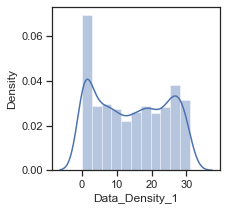

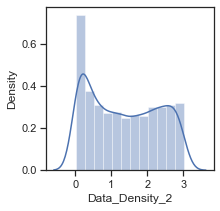

In [25]:
#
# Calculate data density for scatterplot correlation. Slope_1 is Multi-N cells. Slope_2 is 1-N cells.
#

# Calculate the point density
x = df_2['slope_1_ProtCalc_exp1']
y = df_2['slope_1_ProtCalc_exp2']

xy = np.vstack([x,y])
df_2['Data_Density_1'] = gaussian_kde(xy)(xy)
sns.distplot(df_2['Data_Density_1'])
plt.show()


# Calculate the point density
x = df_2['slope_2_ProtCalc_exp1']
y = df_2['slope_2_ProtCalc_exp2']

xy = np.vstack([x,y])
df_2['Data_Density_2'] = gaussian_kde(xy)(xy)
sns.distplot(df_2['Data_Density_2'])
plt.show()

In [ ]:
#
# Scatterplot correlations and histograms
#

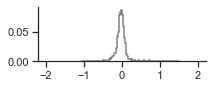

0.10698159434915229
0.4814406455124122


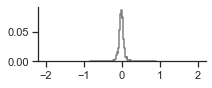

0.10698159434915229
0.4814406455124122


In [26]:
sns.set(rc={'figure.figsize':(3,1)})
sns.set_style('ticks')


df_Protein =  df_2.loc[(df_2['UniqID_exp1'] > 2)]

sns.histplot(df_Protein['slope_1_ProtCalc_exp1'], fill = False, color = 'gray', stat='probability', element="step")
sns.despine()
plt.xlim([-2.2, 2.2])
plt.xlabel("")
plt.ylabel("")
plt.savefig('multiNexp1_hist.pdf', dp1=300, bbox_inches='tight')
plt.show()

print(df_Protein['Mean_Slope_1'].std())
print(df_Protein['Mean_Slope_2'].std())


df_Protein =  df_2.loc[(df_2['UniqID_exp1'] > 2)]

sns.histplot(df_Protein['slope_1_ProtCalc_exp2'], fill = False, color = 'gray', stat='probability', element="step")
sns.despine()
plt.xlim([-2.2, 2.2])
plt.xlabel("")
plt.ylabel("")
plt.savefig('multiNexp2_hist.pdf', dp1=300, bbox_inches='tight')
plt.show()

print(df_Protein['Mean_Slope_1'].std())
print(df_Protein['Mean_Slope_2'].std())

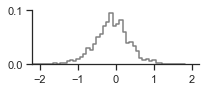

0.10698159434915229
0.4814406455124122


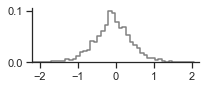

0.10698159434915229
0.4814406455124122


In [27]:
sns.set(rc={'figure.figsize':(3,1)})
sns.set_style('ticks')


df_Protein =  df_2.loc[(df_2['UniqID_exp1'] > 2)]

sns.histplot(df_Protein['slope_2_ProtCalc_exp1'], fill = False, color = 'gray', stat='probability', element="step")
sns.despine()
plt.xlim([-2.2, 2.2])
plt.xlabel("")
plt.ylabel("")
plt.savefig('1Nexp1_hist.pdf', dp1=300, bbox_inches='tight')
plt.show()

print(df_Protein['Mean_Slope_1'].std())
print(df_Protein['Mean_Slope_2'].std())


df_Protein =  df_2.loc[(df_2['UniqID_exp1'] > 2)]

sns.histplot(df_Protein['slope_2_ProtCalc_exp2'], fill = False, color = 'gray', stat='probability', element="step")
sns.despine()
plt.xlim([-2.2, 2.2])
plt.xlabel("")
plt.ylabel("")
plt.savefig('1Nexp2_hist.pdf', dp1=300, bbox_inches='tight')
plt.show()

print(df_Protein['Mean_Slope_1'].std())
print(df_Protein['Mean_Slope_2'].std())

In [28]:
### Color palette

customPalette = sns.dark_palette("silver", reverse=True, as_cmap=True)
alpha = 0.45
sns.set(rc={'figure.figsize':(3,3)})
tick_size = 15


1989
(0.5835635761957965, 7.011183196097023e-182)
1989


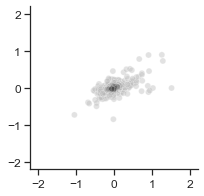

In [29]:
sns.set_style('ticks')

Protein_plot = df_2.loc[(df_2['UniqID_exp1'] > 2) & (df_2['UniqID_exp2'] > 2)]
 


sns.scatterplot(data=Protein_plot, x='slope_1_ProtCalc_exp1', y='slope_1_ProtCalc_exp2', 
                alpha=alpha, legend=False, hue = Protein_plot['Data_Density_1'], 
                palette=customPalette)

print(len(Protein_plot))
print(stats.pearsonr(Protein_plot['slope_1_ProtCalc_exp1'], Protein_plot['slope_1_ProtCalc_exp2']))


plt.ylim([-2.2, 2.2])
plt.xlim([-2.2, 2.2])
tick_size = 12
plt.tick_params(labelsize= tick_size)
plt.locator_params(axis="y", nbins=5)
plt.locator_params(axis="x", nbins=5)
plt.xlabel("")
plt.ylabel("") 
sns.despine()
plt.savefig('multiN_Slopes.pdf', dp1=300, bbox_inches='tight')
print(len(Protein_plot))

1989
(0.942596903239465, 0.0)
4


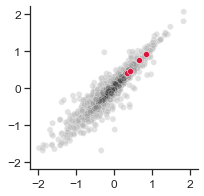

In [30]:
sns.set_style('ticks')

Protein_plot = df_2.loc[(df_2['UniqID_exp1'] > 2) & (df_2['UniqID_exp2'] > 2)]
 


sns.scatterplot(data=Protein_plot, x='slope_2_ProtCalc_exp1', y='slope_2_ProtCalc_exp2', 
                alpha=alpha, legend=False, hue = Protein_plot['Data_Density_2'], 
                palette=customPalette)

print(len(Protein_plot))
print(stats.pearsonr(Protein_plot['slope_2_ProtCalc_exp1'], Protein_plot['slope_2_ProtCalc_exp2']))




Protein_plot = df_2.loc[(df_2['UniqID_exp1'] > 2) & (df_2['UniqID_exp2'] > 2) & (df_2.index.str.contains('RPOA|RPOB|RPOC|RPOD'))]
 


sns.scatterplot(data=Protein_plot, x='slope_2_ProtCalc_exp1', y='slope_2_ProtCalc_exp2', 
                alpha=1, legend=False, color = 'crimson')




plt.ylim([-2.2, 2.2])
plt.xlim([-2.2, 2.2])
tick_size = 12
plt.tick_params(labelsize= tick_size)
plt.locator_params(axis="y", nbins=5)
plt.locator_params(axis="x", nbins=5)
plt.xlabel("")
plt.ylabel("") 
sns.despine()
plt.savefig('1N_Slopes.pdf', dp1=300, bbox_inches='tight')
print(len(Protein_plot))

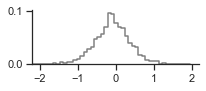

0.10698159434915229
0.4814406455124122


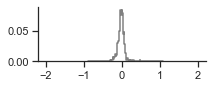

0.10698159434915229
0.4814406455124122


In [31]:
sns.set(rc={'figure.figsize':(3,1)})
sns.set_style('ticks')


df_Protein =  df_2.loc[(df_2['UniqID_exp1'] > 2)]

sns.histplot(df_Protein['Mean_Slope_2'], fill = False, color = 'gray', stat='probability', element="step")
sns.despine()
plt.xlim([-2.2, 2.2])
plt.xlabel("")
plt.ylabel("")
plt.savefig('1N_hist.pdf', dp1=300, bbox_inches='tight')
plt.show()

print(df_Protein['Mean_Slope_1'].std())
print(df_Protein['Mean_Slope_2'].std())


df_Protein =  df_2.loc[(df_2['UniqID_exp1'] > 2)]

sns.histplot(df_Protein['Mean_Slope_1'], fill = False, color = 'gray', stat='probability', element="step")
sns.despine()
plt.xlim([-2.2, 2.2])
plt.xlabel("")
plt.ylabel("")
plt.savefig('multiN_hist.pdf', dp1=300, bbox_inches='tight')
plt.show()

print(df_Protein['Mean_Slope_1'].std())
print(df_Protein['Mean_Slope_2'].std())

In [32]:
# Calculate the point density
x = df_2['Mean_Slope_2']
y = df_2['Mean_Slope_1']

xy = np.vstack([x,y])
df_2['Data_Density_mean'] = gaussian_kde(xy)(xy)

1989
(0.11570963992450167, 2.2841509084664594e-07)
1989


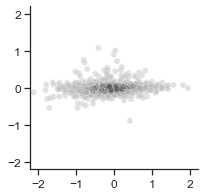

In [33]:
sns.set(rc={'figure.figsize':(3,3)})
sns.set_style('ticks')

Protein_plot = df_2.loc[(df_2['UniqID_exp1'] > 2) & (df_2['UniqID_exp2'] > 2)]
 


sns.scatterplot(data=Protein_plot, x='Mean_Slope_2', y='Mean_Slope_1', 
                alpha=alpha, legend=False, hue = Protein_plot['Data_Density_mean'], 
                palette=customPalette)

print(len(Protein_plot))
print(stats.pearsonr(Protein_plot['Mean_Slope_2'], Protein_plot['Mean_Slope_1']))




# Protein_plot = df_2.loc[(df_2['UniqID_exp1'] > 2) & (df_2['UniqID_exp2'] > 2) & (df_2.index.str.contains('RPOA|RPOB|RPOC|RPOD'))]
 


# sns.scatterplot(data=Protein_plot, x='Mean_Slope_2', y='Mean_Slope_1', 
#                 alpha=1, legend=False, color = 'crimson')




plt.ylim([-2.2, 2.2])
plt.xlim([-2.2, 2.2])
tick_size = 12
plt.tick_params(labelsize= tick_size)
plt.locator_params(axis="y", nbins=5)
plt.locator_params(axis="x", nbins=5)
plt.xlabel("")
plt.ylabel("") 
sns.despine()
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('Mean_Slopes.pdf', dp1=300, bbox_inches='tight')
print(len(Protein_plot))

In [34]:
#
# Individual protein plots
#

In [35]:
background_peptide_number = 4
alpha_dot = 0.65
alpha_line = 0.65

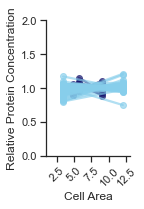

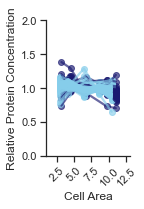

In [36]:
#regplots for specific proteins

df_Protein =  df_2.loc[(df_2['UniqID_exp1'] > background_peptide_number) & (~df_2.index.str.contains('SRA_ECOLI'))
                                         & (df_2['50S_ribosomal_protein'] == True) | (df_2['30S_ribosomal_protein'] == True)]


#figure details
sns.set(rc={'figure.figsize':(1.5,2.5)})
sns.set_style('ticks')
for index, row in df_Protein.iterrows():
    x = [4.9, 5.7, 9]
    y = [row['Normalized_proportion_1_exp2'], 
         row['Normalized_proportion_2_exp2'], 
         row['Normalized_proportion_3_exp2']]
    g = sns.regplot(x=x,y=y, fit_reg=True, ci=False, scatter_kws={'alpha':alpha_dot}, 
                line_kws={'alpha':alpha_line}, lowess=True, color = 'midnightblue', x_jitter = 0.01)



for index, row in df_Protein.iterrows():
    x = [3.44, 12]
    y = [ 
         row['Normalized_proportion_2_exp1'], 
         row['Normalized_proportion_3_exp1']]
    g = sns.regplot(x=x,y=y, fit_reg=True, ci=False, scatter_kws={'alpha':alpha_dot}, 
                line_kws={'alpha':alpha_line}, lowess=True, color = 'skyblue', x_jitter = 0.01)


plt.ylim([0, 2])
plt.xlim([1, 13])
plt.xticks(rotation = 45)
plt.locator_params(axis="x", nbins=5)
plt.xlabel("Cell Area")
plt.ylabel("Relative Protein Concentration")
sns.despine()
plt.savefig('Reps_Ribosome.pdf', dp1=300, bbox_inches='tight')
plt.show()



for index, row in df_Protein.iterrows():
    x = [3.2, 4.5, 6.7, 9.7, 11]
    y = [row['Normalized_proportion_4_exp2'],
         row['Normalized_proportion_5_exp2'], 
         row['Normalized_proportion_6_exp2'], 
         row['Normalized_proportion_7_exp2'],
         row['Normalized_proportion_8_exp2']]
    g = sns.regplot(x=x,y=y, fit_reg=True, ci=False, scatter_kws={'alpha':alpha_dot}, 
                line_kws={'alpha':alpha_line}, lowess=True, color = 'midnightblue', x_jitter = 0.01)

    

for index, row in df_Protein.iterrows():
    x = [2.99, 4.18, 6.44, 8.66, 10.4]
    y = [row['Normalized_proportion_4_exp1'],
         row['Normalized_proportion_5_exp1'], 
         row['Normalized_proportion_6_exp1'], 
         row['Normalized_proportion_7_exp1'],
         row['Normalized_proportion_8_exp1']]
    g = sns.regplot(x=x,y=y, fit_reg=True, ci=False, scatter_kws={'alpha':alpha_dot}, 
                line_kws={'alpha':alpha_line}, lowess=True, color = 'skyblue', x_jitter = 0.01)
                    

plt.ylim([0, 2])
plt.xlim([1, 13])
plt.xticks(rotation = 45)
plt.locator_params(axis="x", nbins=5)
plt.xlabel("Cell Area")
plt.ylabel("Relative Protein Concentration")
sns.despine()
plt.savefig('G1_Ribosome.pdf', dp1=300, bbox_inches='tight')
plt.show()
# df_Protein.to_csv('temp.csv')

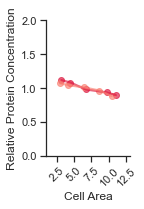

In [37]:
#regplots for specific proteins

df_Protein =  df_2.loc[(df_2['UniqID_exp1'] > background_peptide_number) 
                                         & (df_2.index.str.contains('RS2_ECOLI'))]

for index, row in df_Protein.iterrows():
    x = [3.2, 4.5, 6.7, 9.7, 11]
    y = [row['Normalized_proportion_4_exp2'],
         row['Normalized_proportion_5_exp2'], 
         row['Normalized_proportion_6_exp2'], 
         row['Normalized_proportion_7_exp2'],
         row['Normalized_proportion_8_exp2']]
    g = sns.regplot(x=x,y=y, fit_reg=True, ci=False, scatter_kws={'alpha':alpha_dot}, 
                line_kws={'alpha':alpha_line}, lowess=True, color = 'crimson', x_jitter = 0.01)

    

for index, row in df_Protein.iterrows():
    x = [2.99, 4.18, 6.44, 8.66, 10.4]
    y = [row['Normalized_proportion_4_exp1'],
         row['Normalized_proportion_5_exp1'], 
         row['Normalized_proportion_6_exp1'], 
         row['Normalized_proportion_7_exp1'],
         row['Normalized_proportion_8_exp1']]
    g = sns.regplot(x=x,y=y, fit_reg=True, ci=False, scatter_kws={'alpha':alpha_dot}, 
                line_kws={'alpha':alpha_line}, lowess=True, color = 'salmon', x_jitter = 0.01)
                    

plt.ylim([0, 2])
plt.xlim([1, 13])
plt.xticks(rotation = 45)
plt.locator_params(axis="x", nbins=5)
plt.xlabel("Cell Area")
plt.ylabel("Relative Protein Concentration")
sns.despine()
plt.savefig('G1_RS2.pdf', dp1=300, bbox_inches='tight')
plt.show()

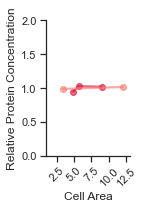

In [38]:
#regplots for specific proteins
    
df_Protein =  df_2.loc[(df_2['UniqID_exp1'] > background_peptide_number) 
                                         & (df_2.index.str.contains('RS2_ECOLI'))]


for index, row in df_Protein.iterrows():
    x = [4.9, 5.7, 9]
    y = [row['Normalized_proportion_1_exp2'], 
         row['Normalized_proportion_2_exp2'], 
         row['Normalized_proportion_3_exp2']]
    g = sns.regplot(x=x,y=y, fit_reg=True, ci=False, scatter_kws={'alpha':alpha_dot}, 
                line_kws={'alpha':alpha_line}, lowess=True, color = 'crimson', x_jitter = 0.01)



for index, row in df_Protein.iterrows():
    x = [3.44, 12]
    y = [ 
         row['Normalized_proportion_2_exp1'], 
         row['Normalized_proportion_3_exp1']]
    g = sns.regplot(x=x,y=y, fit_reg=True, ci=False, scatter_kws={'alpha':alpha_dot}, 
                line_kws={'alpha':alpha_line}, lowess=True, color = 'salmon', x_jitter = 0.01)
    
    

plt.ylim([0, 2])
plt.xlim([1, 13])
plt.xticks(rotation = 45)
plt.locator_params(axis="x", nbins=5)
plt.xlabel("Cell Area")
plt.ylabel("Relative Protein Concentration")
sns.despine()
plt.savefig('Reps_RS2.pdf', dp1=300, bbox_inches='tight')
plt.show()

In [39]:
alpha_dot = 0.7
alpha_line = 0.7

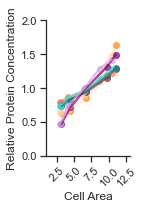

In [40]:
#regplots for specific proteins

df_Protein =  df_2.loc[(df_2['UniqID_exp1'] > background_peptide_number) 
                                         & (df_2.index.str.contains('RPOA'))]

#figure details
sns.set(rc={'figure.figsize':(1.5,2.5)})
sns.set_style('ticks')


for index, row in df_Protein.iterrows():
    x = [3.2, 4.5, 6.7, 9.7, 11]
    y = [row['Normalized_proportion_4_exp2'],
         row['Normalized_proportion_5_exp2'], 
         row['Normalized_proportion_6_exp2'], 
         row['Normalized_proportion_7_exp2'],
         row['Normalized_proportion_8_exp2']]
    g = sns.regplot(x=x,y=y, fit_reg=True, ci=False, scatter_kws={'alpha':alpha_dot}, 
                line_kws={'alpha':0.15}, lowess=True, color = 'darkorange', x_jitter = 0.01)

    

for index, row in df_Protein.iterrows():
    x = [2.99, 4.18, 6.44, 8.66, 10.4]
    y = [row['Normalized_proportion_4_exp1'],
         row['Normalized_proportion_5_exp1'], 
         row['Normalized_proportion_6_exp1'], 
         row['Normalized_proportion_7_exp1'],
         row['Normalized_proportion_8_exp1']]
    g = sns.regplot(x=x,y=y, fit_reg=True, ci=False, scatter_kws={'alpha':alpha_dot}, 
                line_kws={'alpha':alpha_line}, lowess=True, color = 'peachpuff', x_jitter = 0.01)
    

  

    
#regplots for specific proteins

df_Protein =  df_2.loc[(df_2['UniqID_exp1'] > background_peptide_number) 
                                         & (df_2.index.str.contains('RPOB'))]

for index, row in df_Protein.iterrows():
    x = [3.2, 4.5, 6.7, 9.7, 11]
    y = [row['Normalized_proportion_4_exp2'],
         row['Normalized_proportion_5_exp2'], 
         row['Normalized_proportion_6_exp2'], 
         row['Normalized_proportion_7_exp2'],
         row['Normalized_proportion_8_exp2']]
    g = sns.regplot(x=x,y=y, fit_reg=True, ci=False, scatter_kws={'alpha':alpha_dot}, 
                line_kws={'alpha':alpha_line}, lowess=True, color = 'firebrick', x_jitter = 0.01)

    

for index, row in df_Protein.iterrows():
    x = [2.99, 4.18, 6.44, 8.66, 10.4]
    y = [row['Normalized_proportion_4_exp1'],
         row['Normalized_proportion_5_exp1'], 
         row['Normalized_proportion_6_exp1'], 
         row['Normalized_proportion_7_exp1'],
         row['Normalized_proportion_8_exp1']]
    g = sns.regplot(x=x,y=y, fit_reg=True, ci=False, scatter_kws={'alpha':alpha_dot}, 
                line_kws={'alpha':alpha_line}, lowess=True, color = 'salmon', x_jitter = 0.01)
    

   
    
    
#regplots for specific proteins

df_Protein =  df_2.loc[(df_2['UniqID_exp1'] > background_peptide_number) 
                                         & (df_2.index.str.contains('RPOC'))]

for index, row in df_Protein.iterrows():
    x = [3.2, 4.5, 6.7, 9.7, 11]
    y = [row['Normalized_proportion_4_exp2'],
         row['Normalized_proportion_5_exp2'], 
         row['Normalized_proportion_6_exp2'], 
         row['Normalized_proportion_7_exp2'],
         row['Normalized_proportion_8_exp2']]
    g = sns.regplot(x=x,y=y, fit_reg=True, ci=False, scatter_kws={'alpha':alpha_dot}, 
                line_kws={'alpha':alpha_line}, lowess=True, color = 'darkcyan', x_jitter = 0.01)

    

for index, row in df_Protein.iterrows():
    x = [2.99, 4.18, 6.44, 8.66, 10.4]
    y = [row['Normalized_proportion_4_exp1'],
         row['Normalized_proportion_5_exp1'], 
         row['Normalized_proportion_6_exp1'], 
         row['Normalized_proportion_7_exp1'],
         row['Normalized_proportion_8_exp1']]
    g = sns.regplot(x=x,y=y, fit_reg=True, ci=False, scatter_kws={'alpha':alpha_dot}, 
                line_kws={'alpha':alpha_line}, lowess=True, color = 'turquoise', x_jitter = 0.01)

    




    
    
#regplots for specific proteins

df_Protein =  df_2.loc[(df_2['UniqID_exp1'] > background_peptide_number) 
                                         & (df_2.index.str.contains('RPOD'))]

for index, row in df_Protein.iterrows():
    x = [3.2, 4.5, 6.7, 9.7, 11]
    y = [row['Normalized_proportion_4_exp2'],
         row['Normalized_proportion_5_exp2'], 
         row['Normalized_proportion_6_exp2'], 
         row['Normalized_proportion_7_exp2'],
         row['Normalized_proportion_8_exp2']]
    g = sns.regplot(x=x,y=y, fit_reg=True, ci=False, scatter_kws={'alpha':alpha_dot}, 
                line_kws={'alpha':alpha_line}, lowess=True, color = 'purple', x_jitter = 0.01)

    

for index, row in df_Protein.iterrows():
    x = [2.99, 4.18, 6.44, 8.66, 10.4]
    y = [row['Normalized_proportion_4_exp1'],
         row['Normalized_proportion_5_exp1'], 
         row['Normalized_proportion_6_exp1'], 
         row['Normalized_proportion_7_exp1'],
         row['Normalized_proportion_8_exp1']]
    g = sns.regplot(x=x,y=y, fit_reg=True, ci=False, scatter_kws={'alpha':alpha_dot}, 
                line_kws={'alpha':alpha_line}, lowess=True, color = 'plum', x_jitter = 0.01)
                    

plt.ylim([0, 2])
plt.xlim([1, 13])
plt.xticks(rotation = 45)
plt.locator_params(axis="x", nbins=5)
plt.xlabel("Cell Area")
plt.ylabel("Relative Protein Concentration")
sns.despine()
plt.savefig('G1_ALL.pdf', dp1=300, bbox_inches='tight')
plt.show()

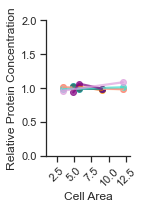

In [41]:
#regplots for specific proteins

df_Protein =  df_2.loc[(df_2['UniqID_exp1'] > background_peptide_number) 
                                         & (df_2.index.str.contains('RPOA'))]


#figure details
sns.set(rc={'figure.figsize':(1.5,2.5)})
sns.set_style('ticks')


for index, row in df_Protein.iterrows():
    x = [4.9, 5.7, 9]
    y = [row['Normalized_proportion_1_exp2'], 
         row['Normalized_proportion_2_exp2'], 
         row['Normalized_proportion_3_exp2']]
    g = sns.regplot(x=x,y=y, fit_reg=True, ci=False, scatter_kws={'alpha':alpha_dot}, 
                line_kws={'alpha':alpha_line}, lowess=True, color = 'darkorange', x_jitter = 0.01)



for index, row in df_Protein.iterrows():
    x = [3.44, 12]
    y = [ 
         row['Normalized_proportion_2_exp1'], 
         row['Normalized_proportion_3_exp1']]
    g = sns.regplot(x=x,y=y, fit_reg=True, ci=False, scatter_kws={'alpha':alpha_dot}, 
                line_kws={'alpha':alpha_line}, lowess=True, color = 'peachpuff', x_jitter = 0.01)
    

plt.ylim([0, 2])
plt.xlim([1, 13])
plt.xticks(rotation = 45)
plt.locator_params(axis="x", nbins=5)
plt.xlabel("Cell Area")
plt.ylabel("Relative Protein Concentration")
plt.savefig('Reps_RPOA.pdf', dp1=300, bbox_inches='tight')

    
#regplots for specific proteins

df_Protein =  df_2.loc[(df_2['UniqID_exp1'] > background_peptide_number) 
                                         & (df_2.index.str.contains('RPOB'))]


#figure details
for index, row in df_Protein.iterrows():
    x = [4.9, 5.7, 9]
    y = [row['Normalized_proportion_1_exp2'], 
         row['Normalized_proportion_2_exp2'], 
         row['Normalized_proportion_3_exp2']]
    g = sns.regplot(x=x,y=y, fit_reg=True, ci=False, scatter_kws={'alpha':alpha_dot}, 
                line_kws={'alpha':alpha_line}, lowess=True, color = 'firebrick', x_jitter = 0.01)



for index, row in df_Protein.iterrows():
    x = [3.44, 12]
    y = [ 
         row['Normalized_proportion_2_exp1'], 
         row['Normalized_proportion_3_exp1']]
    g = sns.regplot(x=x,y=y, fit_reg=True, ci=False, scatter_kws={'alpha':alpha_dot}, 
                line_kws={'alpha':alpha_line}, lowess=True, color = 'salmon', x_jitter = 0.01)

plt.ylim([0, 2])
plt.xlim([1, 13])
plt.xticks(rotation = 45)
plt.locator_params(axis="x", nbins=5)
plt.xlabel("Cell Area")
plt.ylabel("Relative Protein Concentration")
plt.savefig('Reps_RPOB.pdf', dp1=300, bbox_inches='tight')

    
#regplots for specific proteins

df_Protein =  df_2.loc[(df_2['UniqID_exp1'] > background_peptide_number) 
                                         & (df_2.index.str.contains('RPOC'))]


#figure details
for index, row in df_Protein.iterrows():
    x = [4.9, 5.7, 9]
    y = [row['Normalized_proportion_1_exp2'], 
         row['Normalized_proportion_2_exp2'], 
         row['Normalized_proportion_3_exp2']]
    g = sns.regplot(x=x,y=y, fit_reg=True, ci=False, scatter_kws={'alpha':alpha_dot}, 
                line_kws={'alpha':alpha_line}, lowess=True, color = 'darkcyan', x_jitter = 0.01)



for index, row in df_Protein.iterrows():
    x = [3.44, 12]
    y = [ 
         row['Normalized_proportion_2_exp1'], 
         row['Normalized_proportion_3_exp1']]
    g = sns.regplot(x=x,y=y, fit_reg=True, ci=False, scatter_kws={'alpha':alpha_dot}, 
                line_kws={'alpha':alpha_line}, lowess=True, color = 'turquoise', x_jitter = 0.01)
    
    
plt.ylim([0, 2])
plt.xlim([1, 13])
plt.xticks(rotation = 45)
plt.locator_params(axis="x", nbins=5)
plt.xlabel("Cell Area")
plt.ylabel("Relative Protein Concentration")
plt.savefig('Reps_RPOC.pdf', dp1=300, bbox_inches='tight')

    
#regplots for specific proteins
    
df_Protein =  df_2.loc[(df_2['UniqID_exp1'] > background_peptide_number) 
                                         & (df_2.index.str.contains('RPOD'))]


for index, row in df_Protein.iterrows():
    x = [4.9, 5.7, 9]
    y = [row['Normalized_proportion_1_exp2'], 
         row['Normalized_proportion_2_exp2'], 
         row['Normalized_proportion_3_exp2']]
    g = sns.regplot(x=x,y=y, fit_reg=True, ci=False, scatter_kws={'alpha':alpha_dot}, 
                line_kws={'alpha':alpha_line}, lowess=True, color = 'purple', x_jitter = 0.01)



for index, row in df_Protein.iterrows():
    x = [3.44, 12]
    y = [ 
         row['Normalized_proportion_2_exp1'], 
         row['Normalized_proportion_3_exp1']]
    g = sns.regplot(x=x,y=y, fit_reg=True, ci=False, scatter_kws={'alpha':alpha_dot}, 
                line_kws={'alpha':alpha_line}, lowess=True, color = 'plum', x_jitter = 0.01)
    
    

plt.ylim([0, 2])
plt.xlim([1, 13])
plt.xticks(rotation = 45)
plt.locator_params(axis="x", nbins=5)
plt.xlabel("Cell Area")
plt.ylabel("Relative Protein Concentration")
sns.despine()
plt.savefig('Reps_ALL.pdf', dp1=300, bbox_inches='tight')
plt.show()

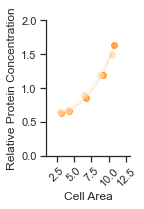

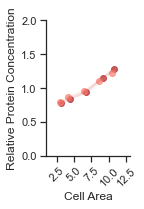

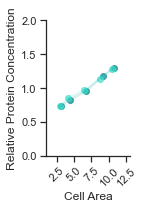

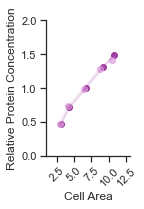

In [42]:
#regplots for specific proteins

df_Protein =  df_2.loc[(df_2['UniqID_exp1'] > background_peptide_number) 
                                         & (df_2.index.str.contains('RPOA'))]

#figure details
sns.set(rc={'figure.figsize':(1.5,2.5)})
sns.set_style('ticks')


for index, row in df_Protein.iterrows():
    x = [3.12, 4.36, 6.66, 9.17, 10.79]
    y = [row['Normalized_proportion_4_exp2'],
         row['Normalized_proportion_5_exp2'], 
         row['Normalized_proportion_6_exp2'], 
         row['Normalized_proportion_7_exp2'],
         row['Normalized_proportion_8_exp2']]
    g = sns.regplot(x=x,y=y, fit_reg=True, ci=False, scatter_kws={'alpha':0.7}, 
                line_kws={'alpha':0.15}, lowess=True, color = 'darkorange', x_jitter = 0.01)

    

for index, row in df_Protein.iterrows():
    x = [2.99, 4.18, 6.44, 8.66, 10.4]
    y = [row['Normalized_proportion_4_exp1'],
         row['Normalized_proportion_5_exp1'], 
         row['Normalized_proportion_6_exp1'], 
         row['Normalized_proportion_7_exp1'],
         row['Normalized_proportion_8_exp1']]
    g = sns.regplot(x=x,y=y, fit_reg=True, ci=False, scatter_kws={'alpha':0.7}, 
                line_kws={'alpha':0.15}, lowess=True, color = 'peachpuff', x_jitter = 0.01)
    
plt.ylim([0, 2])
plt.xlim([1, 13])
plt.xticks(rotation = 45)
plt.locator_params(axis="x", nbins=5)
plt.xlabel("Cell Area")
plt.ylabel("Relative Protein Concentration")
sns.despine()
plt.savefig('G1_RPOA.pdf', dp1=300, bbox_inches='tight')
plt.show()
  

    
#regplots for specific proteins

df_Protein =  df_2.loc[(df_2['UniqID_exp1'] > background_peptide_number) 
                                         & (df_2.index.str.contains('RPOB'))]

for index, row in df_Protein.iterrows():
    x = [3.12, 4.36, 6.66, 9.17, 10.79]
    y = [row['Normalized_proportion_4_exp2'],
         row['Normalized_proportion_5_exp2'], 
         row['Normalized_proportion_6_exp2'], 
         row['Normalized_proportion_7_exp2'],
         row['Normalized_proportion_8_exp2']]
    g = sns.regplot(x=x,y=y, fit_reg=True, ci=False, scatter_kws={'alpha':0.7}, 
                line_kws={'alpha':0.15}, lowess=True, color = 'firebrick', x_jitter = 0.01)

    

for index, row in df_Protein.iterrows():
    x = [2.99, 4.18, 6.44, 8.66, 10.4]
    y = [row['Normalized_proportion_4_exp1'],
         row['Normalized_proportion_5_exp1'], 
         row['Normalized_proportion_6_exp1'], 
         row['Normalized_proportion_7_exp1'],
         row['Normalized_proportion_8_exp1']]
    g = sns.regplot(x=x,y=y, fit_reg=True, ci=False, scatter_kws={'alpha':0.7}, 
                line_kws={'alpha':0.15}, lowess=True, color = 'salmon', x_jitter = 0.01)
    
plt.ylim([0, 2])
plt.xlim([1, 13])
plt.xticks(rotation = 45)
plt.locator_params(axis="x", nbins=5)
plt.xlabel("Cell Area")
plt.ylabel("Relative Protein Concentration")
sns.despine()
plt.savefig('G1_RPOB.pdf', dp1=300, bbox_inches='tight')
plt.show()
   
    
    
#regplots for specific proteins

df_Protein =  df_2.loc[(df_2['UniqID_exp1'] > background_peptide_number) 
                                         & (df_2.index.str.contains('RPOC'))]

for index, row in df_Protein.iterrows():
    x = [3.12, 4.36, 6.66, 9.17, 10.79]
    y = [row['Normalized_proportion_4_exp2'],
         row['Normalized_proportion_5_exp2'], 
         row['Normalized_proportion_6_exp2'], 
         row['Normalized_proportion_7_exp2'],
         row['Normalized_proportion_8_exp2']]
    g = sns.regplot(x=x,y=y, fit_reg=True, ci=False, scatter_kws={'alpha':0.7}, 
                line_kws={'alpha':0.15}, lowess=True, color = 'darkcyan', x_jitter = 0.01)

    

for index, row in df_Protein.iterrows():
    x = [2.99, 4.18, 6.44, 8.66, 10.4]
    y = [row['Normalized_proportion_4_exp1'],
         row['Normalized_proportion_5_exp1'], 
         row['Normalized_proportion_6_exp1'], 
         row['Normalized_proportion_7_exp1'],
         row['Normalized_proportion_8_exp1']]
    g = sns.regplot(x=x,y=y, fit_reg=True, ci=False, scatter_kws={'alpha':0.7}, 
                line_kws={'alpha':0.15}, lowess=True, color = 'turquoise', x_jitter = 0.01)

    
plt.ylim([0, 2])
plt.xlim([1, 13])
plt.xticks(rotation = 45)
plt.locator_params(axis="x", nbins=5)
plt.xlabel("Cell Area")
plt.ylabel("Relative Protein Concentration")
sns.despine()
plt.savefig('G1_RPOC.pdf', dp1=300, bbox_inches='tight')
plt.show()



    
    
#regplots for specific proteins

df_Protein =  df_2.loc[(df_2['UniqID_exp1'] > background_peptide_number) 
                                         & (df_2.index.str.contains('RPOD'))]

for index, row in df_Protein.iterrows():
    x = [3.12, 4.36, 6.66, 9.17, 10.79]
    y = [row['Normalized_proportion_4_exp2'],
         row['Normalized_proportion_5_exp2'], 
         row['Normalized_proportion_6_exp2'], 
         row['Normalized_proportion_7_exp2'],
         row['Normalized_proportion_8_exp2']]
    g = sns.regplot(x=x,y=y, fit_reg=True, ci=False, scatter_kws={'alpha':0.7}, 
                line_kws={'alpha':0.15}, lowess=True, color = 'purple', x_jitter = 0.01)

    

for index, row in df_Protein.iterrows():
    x = [2.99, 4.18, 6.44, 8.66, 10.4]
    y = [row['Normalized_proportion_4_exp1'],
         row['Normalized_proportion_5_exp1'], 
         row['Normalized_proportion_6_exp1'], 
         row['Normalized_proportion_7_exp1'],
         row['Normalized_proportion_8_exp1']]
    g = sns.regplot(x=x,y=y, fit_reg=True, ci=False, scatter_kws={'alpha':0.7}, 
                line_kws={'alpha':0.15}, lowess=True, color = 'plum', x_jitter = 0.01)
                    

plt.ylim([0, 2])
plt.xlim([1, 13])
plt.xticks(rotation = 45)
plt.locator_params(axis="x", nbins=5)
plt.xlabel("Cell Area")
plt.ylabel("Relative Protein Concentration")
sns.despine()
plt.savefig('G1_RPOD.pdf', dp1=300, bbox_inches='tight')
plt.show()


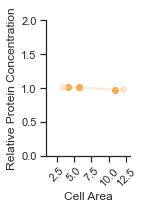

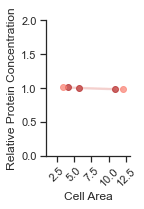

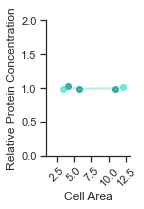

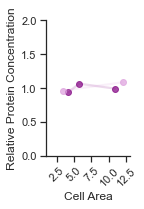

In [43]:
#regplots for specific proteins

df_Protein =  df_2.loc[(df_2['UniqID_exp1'] > background_peptide_number) 
                                         & (df_2.index.str.contains('RPOA'))]


#figure details
sns.set(rc={'figure.figsize':(1.5,2.5)})
sns.set_style('ticks')


for index, row in df_Protein.iterrows():
    x = [4.17, 5.72, 10.88]
    y = [row['Normalized_proportion_1_exp2'], 
         row['Normalized_proportion_2_exp2'], 
         row['Normalized_proportion_3_exp2']]
    g = sns.regplot(x=x,y=y, fit_reg=True, ci=False, scatter_kws={'alpha':0.7}, 
                line_kws={'alpha':0.15}, lowess=True, color = 'darkorange', x_jitter = 0.01)



for index, row in df_Protein.iterrows():
    x = [3.44, 12]
    y = [ 
         row['Normalized_proportion_2_exp1'], 
         row['Normalized_proportion_3_exp1']]
    g = sns.regplot(x=x,y=y, fit_reg=True, ci=False, scatter_kws={'alpha':0.7}, 
                line_kws={'alpha':0.15}, lowess=True, color = 'peachpuff', x_jitter = 0.01)
    

plt.ylim([0, 2])
plt.xlim([1, 13])
plt.xticks(rotation = 45)
plt.locator_params(axis="x", nbins=5)
plt.xlabel("Cell Area")
plt.ylabel("Relative Protein Concentration")
sns.despine()
plt.savefig('Reps_RPOA.pdf', dp1=300, bbox_inches='tight')
plt.show()
    
#regplots for specific proteins

df_Protein =  df_2.loc[(df_2['UniqID_exp1'] > background_peptide_number) 
                                         & (df_2.index.str.contains('RPOB'))]


#figure details
for index, row in df_Protein.iterrows():
    x = [4.17, 5.72, 10.88]
    y = [row['Normalized_proportion_1_exp2'], 
         row['Normalized_proportion_2_exp2'], 
         row['Normalized_proportion_3_exp2']]
    g = sns.regplot(x=x,y=y, fit_reg=True, ci=False, scatter_kws={'alpha':0.7}, 
                line_kws={'alpha':0.15}, lowess=True, color = 'firebrick', x_jitter = 0.01)



for index, row in df_Protein.iterrows():
    x = [3.44, 12]
    y = [ 
         row['Normalized_proportion_2_exp1'], 
         row['Normalized_proportion_3_exp1']]
    g = sns.regplot(x=x,y=y, fit_reg=True, ci=False, scatter_kws={'alpha':0.7}, 
                line_kws={'alpha':0.15}, lowess=True, color = 'salmon', x_jitter = 0.01)

plt.ylim([0, 2])
plt.xlim([1, 13])
plt.xticks(rotation = 45)
plt.locator_params(axis="x", nbins=5)
plt.xlabel("Cell Area")
plt.ylabel("Relative Protein Concentration")
sns.despine()
plt.savefig('Reps_RPOB.pdf', dp1=300, bbox_inches='tight')
plt.show() 
    
    
#regplots for specific proteins

df_Protein =  df_2.loc[(df_2['UniqID_exp1'] > background_peptide_number) 
                                         & (df_2.index.str.contains('RPOC'))]


#figure details
for index, row in df_Protein.iterrows():
    x = [4.17, 5.72, 10.88]
    y = [row['Normalized_proportion_1_exp2'], 
         row['Normalized_proportion_2_exp2'], 
         row['Normalized_proportion_3_exp2']]
    g = sns.regplot(x=x,y=y, fit_reg=True, ci=False, scatter_kws={'alpha':0.7}, 
                line_kws={'alpha':0.15}, lowess=True, color = 'darkcyan', x_jitter = 0.01)



for index, row in df_Protein.iterrows():
    x = [3.44, 12]
    y = [ 
         row['Normalized_proportion_2_exp1'], 
         row['Normalized_proportion_3_exp1']]
    g = sns.regplot(x=x,y=y, fit_reg=True, ci=False, scatter_kws={'alpha':0.7}, 
                line_kws={'alpha':0.15}, lowess=True, color = 'turquoise', x_jitter = 0.01)
    
    
plt.ylim([0, 2])
plt.xlim([1, 13])
plt.xticks(rotation = 45)
plt.locator_params(axis="x", nbins=5)
plt.xlabel("Cell Area")
plt.ylabel("Relative Protein Concentration")
sns.despine()
plt.savefig('Reps_RPOC.pdf', dp1=300, bbox_inches='tight')
plt.show()
    
#regplots for specific proteins
    
df_Protein =  df_2.loc[(df_2['UniqID_exp1'] > background_peptide_number) 
                                         & (df_2.index.str.contains('RPOD'))]


for index, row in df_Protein.iterrows():
    x = [4.17, 5.72, 10.88]
    y = [row['Normalized_proportion_1_exp2'], 
         row['Normalized_proportion_2_exp2'], 
         row['Normalized_proportion_3_exp2']]
    g = sns.regplot(x=x,y=y, fit_reg=True, ci=False, scatter_kws={'alpha':0.7}, 
                line_kws={'alpha':0.15}, lowess=True, color = 'purple', x_jitter = 0.01)



for index, row in df_Protein.iterrows():
    x = [3.44, 12]
    y = [ 
         row['Normalized_proportion_2_exp1'], 
         row['Normalized_proportion_3_exp1']]
    g = sns.regplot(x=x,y=y, fit_reg=True, ci=False, scatter_kws={'alpha':0.7}, 
                line_kws={'alpha':0.15}, lowess=True, color = 'plum', x_jitter = 0.01)
    
    

plt.ylim([0, 2])
plt.xlim([1, 13])
plt.xticks(rotation = 45)
plt.locator_params(axis="x", nbins=5)
plt.xlabel("Cell Area")
plt.ylabel("Relative Protein Concentration")
sns.despine()
plt.savefig('Reps_RPOD.pdf', dp1=300, bbox_inches='tight')
plt.show()